#  ######_Assingnment_3 (ANAS ALHARDI)_########

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


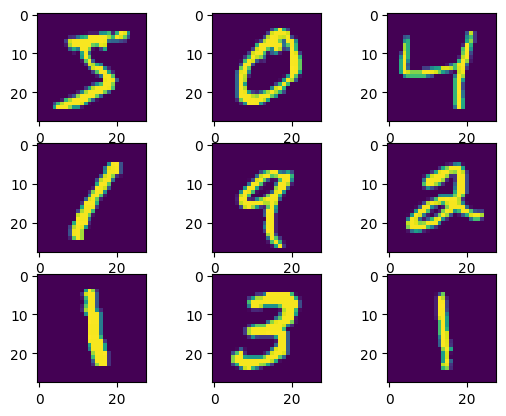

In [5]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])

In [6]:
# Data Preprocessing
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# One-Hot Encoding
train_labels = tf.one_hot(train_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

In [8]:
# Define Custom Neural Network
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
# Custom Loss Function
def custom_sparse_categorical_crossentropy(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [10]:
# Custom Accuracy Metric
def custom_accuracy(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    return accuracy

In [11]:
# Model Compilation
model.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])

In [12]:
# Model Training
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5675 - custom_accuracy: 0.9106
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5129 - custom_accuracy: 0.9530
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5005 - custom_accuracy: 0.9644
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4931 - custom_accuracy: 0.9712
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4882 - custom_accuracy: 0.9755


In [13]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 1.4912 - custom_accuracy: 0.9714
Test accuracy: 97.14%


313/313 [==============================] - 1s 2ms/step
7


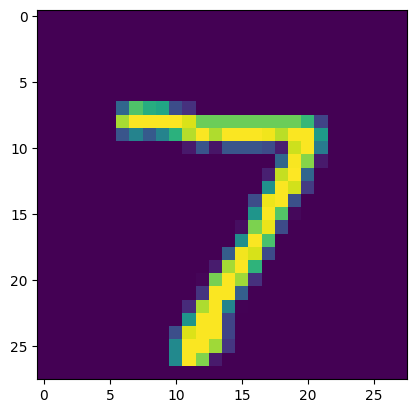

In [14]:
plt.imshow(test_images[0])
prediction=model.predict(test_images)
print(np.argmax(prediction[0]))